IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

LOAD DATASET

In [3]:
df=pd.read_csv("weather_classification_data.csv")

DATA INCEPTIONS

In [5]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Weather Type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,Rainy


In [6]:
df.tail()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Weather Type
13195,10,74,14.5,71,overcast,1003.15,1,Summer,1.0,Rainy
13196,-1,76,3.5,23,cloudy,1067.23,1,Winter,6.0,Snowy
13197,30,77,5.5,28,overcast,1012.69,3,Autumn,9.0,Cloudy
13198,3,76,10.0,94,overcast,984.27,0,Winter,2.0,Snowy
13199,-5,38,0.0,92,overcast,1015.37,5,Autumn,10.0,Rainy


In [7]:
df.shape

(13200, 10)

In [13]:
df['Weather Type'].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [15]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

In [17]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Weather Type            0
dtype: int64

In [19]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Weather Type'],
      dtype='object')

In [21]:
df.dtypes

Temperature               int64
Humidity                  int64
Wind Speed              float64
Precipitation (%)         int64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Weather Type             object
dtype: object

VISUALIZATION METHODS

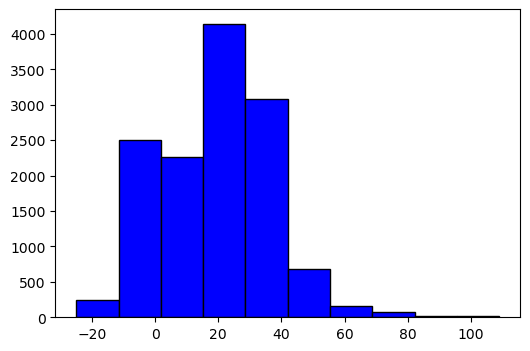

In [24]:
fig=plt.figure(figsize=(6,4))
plt.hist(x=df['Temperature'],color='blue',edgecolor='black')
#plt.xlabel=('Temperature')
#plt.ylabel=('Frequency')
#plt.title=('Histogram')
plt.show()

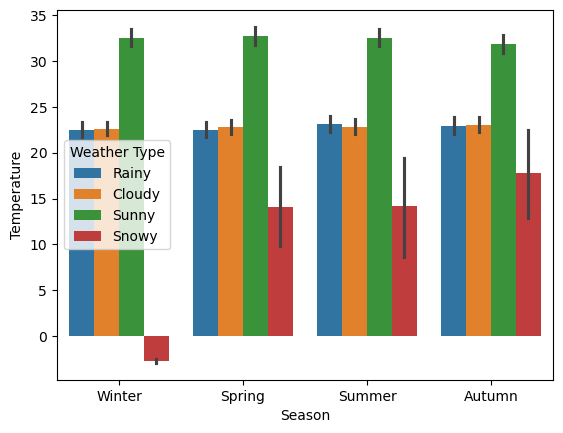

In [16]:
sns.barplot(data=df,x='Season',y='Temperature',hue='Weather Type')
plt.show()

In [27]:
cat_feature=[feature for feature in df.columns if df[feature].dtype=='object']
cat_feature

['Cloud Cover', 'Season', 'Weather Type']

DATA TRANSFORMATION

In [29]:
le=LabelEncoder()
for cat_feature in df.columns:
    df[cat_feature]=le.fit_transform(df[cat_feature])
print(df.head())    

   Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
0           39        53          19                 82            3   
1           64        76          17                 71            3   
2           55        44          14                 16            0   
3           63        63           3                 82            0   
4           52        54          34                 66            2   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Weather Type  
0                  3253         2       3                7             1  
1                  3313         7       1               20             0  
2                  4027         5       1               11             3  
3                  4659         7       1                2             3  
4                  1384         1       3                5             1  


In [30]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [31]:
x

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km)
0,39,53,19,82,3,3253,2,3,7
1,64,76,17,71,3,3313,7,1,20
2,55,44,14,16,0,4027,5,1,11
3,63,63,3,82,0,4659,7,1,2
4,52,54,34,66,2,1384,1,3,5
...,...,...,...,...,...,...,...,...,...
13195,35,54,29,71,2,2532,1,2,2
13196,24,56,7,23,1,5053,1,3,12
13197,55,57,11,28,2,3437,3,0,18
13198,28,56,20,94,2,857,0,3,4


In [32]:
y

0        1
1        0
2        3
3        3
4        1
        ..
13195    1
13196    2
13197    0
13198    2
13199    1
Name: Weather Type, Length: 13200, dtype: int32

In [33]:
ss=StandardScaler()
ss.fit_transform(x)

array([[-0.29508213,  0.21240351, -0.04808164, ..., -0.52010407,
         0.98783148, -0.58223095],
       [ 1.14636711,  1.35138482, -0.19283648, ...,  0.77642368,
        -0.72923141,  1.34576796],
       [ 0.62744538, -0.23328483, -0.40996874, ...,  0.25781258,
        -0.72923141,  0.01099948],
       ...,
       [ 0.62744538,  0.41048722, -0.627101  , ..., -0.26079852,
        -1.58776285,  1.04915274],
       [-0.9293198 ,  0.36096629,  0.02429578, ..., -1.03871517,
         0.98783148, -1.02715378],
       [-1.39058355, -1.52082893, -1.42325263, ...,  0.25781258,
        -1.58776285,  1.34576796]])

SPLIT THE DATA IN TO FOUR PARTS

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [43]:
rfc=RandomForestClassifier(random_state=42)

TRAIN THE DATA

In [47]:
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [48]:
y_pred=rfc.predict(x_test)

EVALUATION OF RESULT

In [50]:
print(accuracy_score(y_test,y_pred)*100)

92.03030303030303


In [51]:
print(confusion_matrix(y_test,y_pred))

[[730  32  19  22]
 [ 32 767  10  23]
 [ 18  22 762  17]
 [ 37  16  15 778]]


In [56]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rfc, x, y, cv=skf, scoring='accuracy')
print("Mean Accuracy:", scores.mean())


Mean Accuracy: 0.9144696969696969


In [57]:
y_pred1 = rfc.predict(x_test)
print(confusion_matrix(y_test, y_pred1))


[[730  32  19  22]
 [ 32 767  10  23]
 [ 18  22 762  17]
 [ 37  16  15 778]]


In [58]:
print(accuracy_score(y_test,y_pred1)*100)

92.03030303030303
